### Zoo Dataset

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing

In [2]:
#readng the data
data=pd.read_csv("zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#for knowing the shape
data.shape

(101, 18)

In [4]:
#assigning input and output variables
x=data.iloc[:,1:17]
y=data.iloc[:,17]

In [5]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [7]:
#describing the data
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
#viewingthe dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
#checking for  duplicated values
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [10]:
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

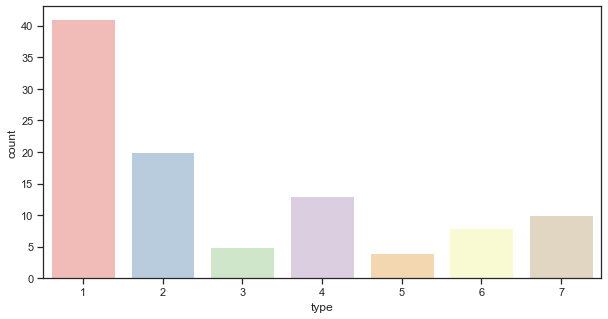

In [11]:
import seaborn as sns
import matplotlib.pyplot  as plt
sns.set(style = 'ticks',font_scale =1)
plt.subplots(figsize = (10,5))
sns.countplot(x='type',data = data, palette = 'Pastel1')

In [16]:
kfold=KFold(n_splits=10)
model_1=KNeighborsClassifier(n_neighbors=1)
result=cross_val_score(model_1,x,y,cv=kfold)
result.mean()

0.9700000000000001

### splitting the data

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30,stratify =y)

In [18]:
x_train


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
76,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0


In [19]:
y_train.head()

21    2
72    7
38    4
35    1
52    5
Name: type, dtype: int64

In [20]:
x_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
37,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
23,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [21]:
y_test.head()

90    3
91    3
37    2
23    2
4     1
Name: type, dtype: int64

# using gridsearchCV

In [22]:

from sklearn.model_selection import GridSearchCV

In [23]:
kvalues=np.array(range(1,50))
kvalues

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [24]:
temp_dict={"n_neighbors":[kvalues]}
parameters=dict(n_neighbors=kvalues)
parameters
temp_dict


{'n_neighbors': [array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])]}

In [25]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=parameters)

In [26]:
grid.fit(x,y)

C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
(grid.best_params_)

{'n_neighbors': 1}

In [28]:
(grid.best_score_)

0.96

### Visualizing the CV results

C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packag

C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packag

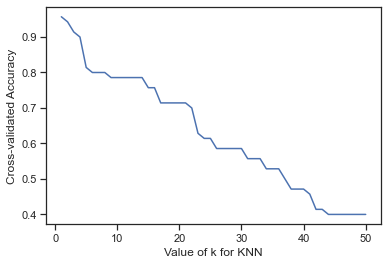

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1,51)
k_scores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()

### Using KNN Classifier for prediction¶

In [30]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
model = KNeighborsClassifier(n_neighbors = 1).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9354838709677419


In [31]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         4
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.76      0.86      0.79        31
weighted avg       0.91      0.94      0.92        31



C:\Users\pabba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The acuuracy of the model is 93%

### Glass Dataset

In [33]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
#reading the data
data=pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [35]:
# for knowing the shape of the data
data.shape

(214, 10)

In [36]:
# assgning input and output variables
x=data.iloc[:,0:9]
y=data.iloc[:,9]


In [37]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [39]:
#vewing the dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [40]:
#for duplicated values
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [41]:
# value count for glass types
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [42]:
#Scaling the data
scale=preprocessing.StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

###  splitting the  data

In [43]:
##spliting the data into the train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [44]:
x_train

array([[ 1.27553981, -0.24285268,  0.75430285, ...,  0.74871043,
        -0.35287683, -0.5864509 ],
       [ 0.25895762, -0.8320314 , -0.57992572, ...,  0.7980123 ,
        -0.35287683, -0.5864509 ],
       [ 0.01471385, -0.47606926,  0.65006624, ...,  0.12187238,
        -0.35287683,  0.95658795],
       ...,
       [-0.06119975,  0.38314972, -1.86551055, ...,  1.43189347,
        -0.35287683, -0.5864509 ],
       [-0.53648493, -0.66018761,  0.6083716 , ..., -0.68104378,
        -0.35287683, -0.5864509 ],
       [ 0.22595171,  0.7268373 , -0.20467394, ...,  0.43176984,
        -0.35287683, -0.5864509 ]])

In [45]:
y_train

48     1
164    5
96     2
149    3
16     1
      ..
132    2
33     1
109    2
139    2
176    6
Name: Type, Length: 171, dtype: int64

In [46]:
x_test

array([[ 8.11266886e-03, -6.84736722e-01,  6.84811780e-01,
        -4.11374859e-01, -1.04737957e-01,  1.88950826e-01,
        -1.95068209e-01, -3.52876828e-01,  3.01397308e+00],
       [ 1.52968536e+00, -1.20107111e-01,  6.22269816e-01,
        -1.25457605e+00, -8.55319668e-01, -5.79492291e-01,
         8.54357288e-01, -3.52876828e-01, -2.77843132e-01],
       [-6.09097944e-01,  1.86756807e-01,  6.15320709e-01,
         5.03781754e-02, -2.60030725e-01,  2.19688551e-01,
        -7.02173148e-01, -3.52876828e-01, -5.86450902e-01],
       [-2.49333469e-01,  5.91817180e-01,  6.36168030e-01,
        -1.70460232e-01,  1.02319067e-01, -2.62132465e-02,
        -7.93733762e-01, -3.52876828e-01, -5.86450902e-01],
       [-2.82339384e-01, -7.33834949e-01,  6.15320709e-01,
        -1.90536451e-01,  4.77609922e-01,  1.88950826e-01,
        -2.58456327e-01, -3.52876828e-01, -5.86450902e-01],
       [ 1.23593271e+00,  9.60053883e-01,  7.61251959e-01,
        -1.07389008e+00, -1.67060670e+00, -4.104348

In [47]:
y_test

145    2
69     1
119    2
1      1
23     1
162    3
116    2
160    3
61     1
20     1
25     1
89     2
135    2
112    2
107    2
8      1
180    6
211    7
123    2
76     2
74     2
173    5
12     1
77     2
39     1
117    2
34     1
73     2
203    7
81     2
98     2
24     1
201    7
142    2
63     1
99     2
165    5
97     2
121    2
170    5
191    7
131    2
103    2
Name: Type, dtype: int64

In [48]:
model1=KNeighborsClassifier(n_neighbors=4)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [49]:
y_pred=model1.predict(x_test)
y_pred

array([2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 7, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 7, 2, 2, 1, 5, 1, 1, 1, 5, 1, 1, 2, 7, 2, 1],
      dtype=int64)

In [50]:

#accuracy
np.mean(y_pred==y_test)

0.7441860465116279

### KNN using Grid serach

In [51]:
model=KNeighborsClassifier()
n_neighbors = np.array(range(1,10))
param_grid = dict(n_neighbors=n_neighbors)

In [52]:
gsv=GridSearchCV(model,param_grid=param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [53]:
gsv.best_params_

{'n_neighbors': 2}

In [54]:
gsv.best_score_

0.7020168067226891

### Visualization of data

C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pabba\anaconda3\lib\site-packag

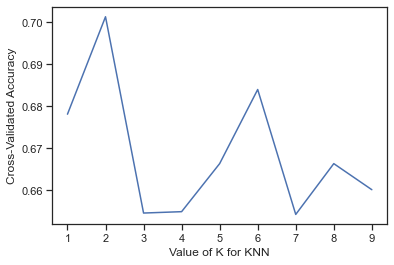

In [55]:
import matplotlib.pyplot as plt
k_range = range(1,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### The accuracy of the model is nearly 75%